In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plot_routines import plot_routines
from scipy.interpolate import interp1d
import seaborn

In [2]:
# Loading the data into a plotting tool class.
micro_path = '/home/jakob/Project_Divestment/PyDivestment/output_data/P3o2/micro/mean.h5'
macro_path = '/home/jakob/Project_Divestment/PyDivestment/output_data/P3o2/mean/mean.h5'
with pd.HDFStore(micro_path) as store:
    micro_data = store.select('dat', 'approximate=1 & test=False & sample=0 & eps=0.05 & tau>0.5')
with pd.HDFStore(macro_path) as store:
    macro_data = store.select('dat', 'approximate=2 & test=False & sample=0 & eps=0.05 & tau>0.5')
    
for df in [micro_data, macro_data]:
    df.index = df.index.droplevel(['approximate', 'test', 'sample', 'eps'])
    df.index.names = [r'$\tau$',r'$\phi$', 'tsteps']

In [3]:
macro_data.head()

W_c       W_d          c         g       i_c  \
$\tau$ $\phi$ tsteps                                                      
2.0    0.05   0.0     0.519435  0.519435   1.000000  8.000000  0.466667   
              4.5     0.684568  0.829315   3.322537  7.963522  0.440168   
              9.0     0.874049  1.051004   6.007797  7.914791  0.433067   
              13.5    1.050547  1.234183   8.806352  7.854719  0.413965   
              18.0    1.211743  1.395163  11.514966  7.783730  0.393643   

                           k_c       k_d       l_c       l_d       n_c  \
$\tau$ $\phi$ tsteps                                                     
2.0    0.05   0.0     0.500000  0.500000  0.437110  0.562890  0.466667   
              4.5     0.958978  1.052873  0.448538  0.551462  0.487193   
              9.0     1.506463  1.705759  0.449823  0.550177  0.478517   
              13.5    2.063792  2.440665  0.443184  0.556816  0.453432   
              18.0    2.582209  3.241927  0.431080  0.568920  0.427710   

                        ...          r_d  time         w    mu_c^c    mu_c^d  \
$\tau$ $\phi$ tsteps    ...                                                    
2.0    0.05   0.0       ...     0.656511   0.0  0.583161  0.500000  0.500000   
              4.5       ...     0.448294   4.5  0.854236  1.364519  0.573672   
              9.0       ...     0.351595   9.0  1.088513  2.166466  0.901554   
              13.5      ...     0.295635  13.5  1.294221  2.957544  1.323133   
              18.0      ...     0.259150  18.0  1.475716  3.699602  1.747565   

                        mu_d^c    mu_d^d         x         y         z  
$\tau$ $\phi$ tsteps                                                    
2.0    0.05   0.0     0.500000  0.500000 -0.066667 -0.081065  0.487241  
              4.5     0.616068  1.468126 -0.025613 -0.005823  0.441052  
              9.0     0.986138  2.365625 -0.042967 -0.068639  0.441786  
              13.5    1.471488  3.243971 -0.093136 -0.134673  0.436629  
              18.0    2.040888  4.139084 -0.144580 -0.182598  0.430202  

[5 rows x 22 columns]

In [4]:
def l_2_distance(d1, d2, observable=None):
    
    d1_data = d1[[observable]]
    d2_data = d2[[observable]]
    
    names = d1.index.names
    print(names)
    indices = {ax: list(d1.index.levels[names.index(ax)].values) for ax in names[:2]}
    print(indices)
    output = np.zeros((len(indices[names[0]]),len(indices[names[1]])))
    
    for i, n0 in enumerate(indices[names[0]]):
        for j, n1 in enumerate(indices[names[1]]):
            levels = names[:2]
            tkey = [n0, n1]
    
            # get values and times from dataframes
            d1_slice = d1_data.xs(key=tkey, level=levels).values.T[0][:-1]
            #d1_times = d1_data.xs(key=tkey, level=levels).index.values[:-1]

            d2_slice = d2_data.xs(key=tkey, level=levels).values.T[0][:-1]
            #d2_times = d2_data.xs(key=tkey, level=levels).index.values[:-1]
            
            # interpolate to get values on equal timepoints
            #d1_ipl = interp1d(d1_times, d1_slice)
            #d2_ipl = interp1d(d2_times, d2_slice)

            #samples = 200
            #times = np.linspace(d1_times[0], min(d1_times[-1], d2_times[-1]), samples)
            #d1_ipl_data = d1_ipl(times)
            #d2_ipl_data = d2_ipl(times)
            d1_ipl_data = d1_slice
            d2_ipl_data = d2_slice
            dd = d1_ipl_data - d2_ipl_data
            l2 = np.sqrt(sum(dd*dd))
            output[i, j] = l2
            
    return output, indices, names[:2]

['$\tau$', '$\phi$', 'tsteps']
{'$\\tau$': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0], '$\\phi$': [0.0, 0.050000000000000003, 0.10000000000000001, 0.14999999999999999, 0.20000000000000001, 0.25, 0.29999999999999999, 0.34999999999999998, 0.40000000000000002, 0.45000000000000001, 0.5, 0.55000000000000004, 0.59999999999999998, 0.65000000000000002, 0.69999999999999996, 0.75, 0.80000000000000004, 0.84999999999999998, 0.90000000000000002, 0.94999999999999996, 1.0]}


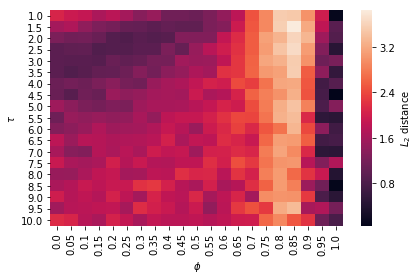

In [5]:
levels=['eps']
key=[0.05]

data, indices, ax_names = l_2_distance(micro_data, macro_data, observable='x')

fig = plt.figure()
ax = fig.add_subplot(111)

seaborn.heatmap(data,
                yticklabels=indices[ax_names[0]],
                xticklabels=[round(x, 3) for x in indices[ax_names[1]]],
                ax=ax,
                cbar_kws={'label': '$L_2$ distance'})
ax.set_ylabel(ax_names[0])
ax.set_xlabel(ax_names[1])

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('heatmap.png')
fig.savefig('heatmap.pdf')